<a href="https://colab.research.google.com/github/pui-sum-rv/lab2/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Color Spaces and Thresholding

These laboratory excersises are solved on Google Colab and are save on GitHub repo that is connected to GitHub Classroom.

## Tools You need to use to Submit Assignments

In this document, you will solve tasks. This is a Jupyter Notebook which has the **.ipynb** extension, is an interactive web environment for data analysis, visualization, solution presentations, education, and more.

**Google Colab** is a tool that allows you to run and share Jupyter Notebook files on Google's servers, including the use of Google's CPU, GPU, and TPU resources. Colab is like Google Docs for Jupyter Notebooks. **Google Colab does not automatically save your assignment to GitHub.**

**You use GitHub to save and submit your assignments.** When you accept the assignment through GitHub Classroom, a repository is automatically created on your GitHub account with a copy of the task. This is where you will save your solutions. Saving your solutions submits the tasks for that lab.

## How to Solve the Tasks?
1. Accept the task via the Google Classroom link that you will receive. Google Classroom will create a repository on your account.
2. Go to the newly created repository on your account and click on the .ipynb file, then click Open in Colab.
3. You will solve the tasks in Google Colab.

## How to Save (Submit) Tasks?

1. In Google Colab, click on the Open settings gear icon in the top-right corner.
2. Click on the GitHub tab and check the box for Access private repositories and organizations.
3. A new window will open for you to grant access to GitHub. For ferit-osirv, click Grant.
4. Save and exit the settings.
5. Click on File > Save a copy in GitHub.
6. Select the lab repository that includes your name.

> *Note:* You only need to complete steps 1-4 the first time.

7. Click on **File > Save a copy in GitHub**.
8. Select created repository **koji uključuje vaše ime**.

## Copying Files from the GitHub Repository

For completing the exercises, you will need images and other files that will be stored in the GitHub repository of the exercise. A command like this will be available in the notebook for each exercise. It will copy the files from GitHub to the Google Colab environment.

**You need to run this command before starting each exercise.**

In [1]:
!rm -rf clone && git clone https://github.com/pui-sum-rv/lab2 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Repository not found.
fatal: repository 'https://github.com/ferit-osirv/lab2/' not found


**Google Colab will occasionally delete all files**. Therefore, you might need to rerun this command between sessions. If you encounter errors indicating that files do not exist, try running the command again.

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Color spaces

In this lab, you'll get familiar with image color spaces. On the web and in general usage, most images are encoded as **RGB**: **R**ed, **G**reen, and **B**lue. OpenCV generally uses **BGR**: Blue, Green, Red.

This is just one of the many ways we can represent an image. In an RGB image, we get a pixel by mixing the three colors. We can get the same pixel by using different numbers and formulae to combine them. For instance, the **CMYK** color space encodes each pixel in 4 primary colors: **C**yan, **M**agenta, **Y**ellow and **K**ey (Black). Since printers use these primary colors, CMYK is often used when preparing images for print.

Not all color spaces consist only of primary colors. For instance, **HSV** (**H**ue, **S**aturation, **V**alue) stores the color in Hue, the color's intensity in Saturation, and the general brightness of that pixel in Value. The Hue portion is a number in [0, 179] (in OpenCV, usually it's an arc around a circle, so [0, 360)) where 0 is red, and the hue slowly shifts to green and then blue as you get to higher numbers.

![](hsv_1.png)

You can think of the whole HSV color space as a cylinder. The height on the cylinder corresponds to how dark the pixel is, the distance from the center tells you how non-gray it is, and the angle tells you which color the pixel is.


There are many color spaces each with its uses. One other color space we'll mention in **YCbCr**. Y is the **luma** component, similar to the Value in HSV. Cb is the **blue-difference chroma component**, i.e. how blue should this pixel be tinted. Similarly, Cr is the **red-difference chroma component**, which tells you how much should a pixel be tinted red. Even with a different type of representation, each YCbCr is capable of showing all RGB images.

![](ycbcr.png)

*(source: https://en.wikipedia.org/wiki/YCbCr#/media/File:CCD.png)*

The reason YCbCr is important is because of the human eye. Our eyes are much more sensitive to luminance than actual color differences. Therefore, when compressing images, it's better to compress the chroma components than luminance if you want the image to look the same to a human observer.  This is called **chroma subsampling** and is used heavily in image and video compression, including MPEG, JPEG, DVD and Blu-Rays, and many others.

## In OpenCV

OpenCV supports a plethora of color spaces for images. The main function to convert color spaces is: [img = cv.cvtColor(img, code)](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). The `code` tells OpenCV **from** which format to convert the image, as well as **to** which format. You can see all the color conversion codes [here](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0). For example:

- cv.COLOR_BGR2YCrCb (BGR to YCbCr)
- cv.COLOR_YCrCb2BGR (back to BGR as the name suggests)
- cv.COLOR_RGB2HSV
- etc.

Note: You'll have to convert the image back to RGB if you want to use matplotlib to display it in its original form.


## Task 1

Load the image images/peppers.png using OpenCV and convert it to the HSV color space using the aforementioned function. Then, add 30 to the H (hue) channel of the HSV image for each pixel. Convert that image back to RGB and display it.

## Task 2

Load the image `images/peppers.png` using OpenCV and convert it to the HSV color space using the aforementioned function. Then, set the H (hue) channel of the HSV image to 0 for each pixel. Convert that image back to RGB and display it.

# Thresholding

## What is Thresholding?

The simplest segmentation method

Application example: Separate out regions of an image corresponding to
objects which we want to analyze. This separation is based on the variation
of intensity between the object pixels and the background pixels.

To differentiate the pixels we are interested in from the rest (which will
eventually be rejected), we perform a comparison of each pixel intensity
value with respect to a threshold (determined according to the problem to
solve).

Once we have separated properly the important pixels, we can set them with
a determined value to identify them (i.e. we can assign them a value of 0
(black), 255 (white) or any value that suits your needs).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Example.jpg)


## Simple Thresholding

Here, the matter is straight forward. If pixel value is greater than a
threshold value, it is assigned one value (may be white), else it is assigned
another value (may be black). The function used is `cv2.threshold`. First
argument is the source image, which should be a grayscale image. Second
argument is the threshold value which is used to classify the pixel values.
Third argument is the ` maxVal ` which represents the value to be given if pixel
value is more than (sometimes less than) the threshold value. OpenCV provides
different styles of thresholding and it is decided by the fourth parameter of
the function. Different types are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

To illustrate how these thresholding processes work, let’s consider that we
have a source image with pixels with intensity values $` src(x,y) `$. 
The plot below
depicts this. The horizontal blue line represents the threshold $` thresh `$ (fixed).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Base_Figure.png)

The documentation clearly explains what each type is meant for. [Please check out the
documentation](http://docs.opencv.org/doc/tutorials/imgproc/threshold/threshold.html).

## Task 3

Using OpenCV, load the image `images/apple.jpg` as a **grayscale** image. Apply simple **binary** thresholding in two ways: 1) using the aforementioned OpenCV function and 2) using numpy by setting all pixel values above a certain threshold to 255 and the rest to 0. Display the thresholded image.

In [3]:
# opencv

In [4]:
# numpy

### Otsu Binarization

**Binarization** of an image is the process of converting the image into a format where each pixel can only be one of two possible values. For `uint8` images, these values are typically `0` (black) and `255` (white). For `float` images, the values are `0` (black) or `1.0` (white). **Binarization** is often a precursor to **thresholding**, where an image is divided into completely white and black regions, and then only the parts of the original image corresponding to completely white regions in the binary image are retained. Mathematically, by multiplying the original and binary images, the pixels that are completely white in the binary image remain unchanged, while those that are completely black are multiplied by 0 and thus will be completely black in the product image.

In the previous example, you manually set the threshold. Otsu's binarization is a more advanced method that, based on the **histogram** of the image, determines the optimal threshold that best separates the pixels. A histogram is a graph that shows the number of occurrences of each value in a dataset. In the case of an image, the histogram shows for each color value how many pixels have that color.

Let's look at the histogram of the `apple.jpg` image.

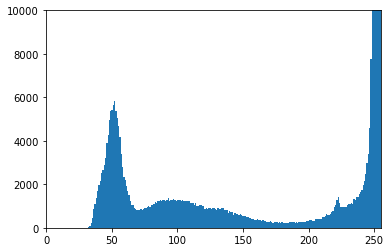

In [11]:
img = cv.imread('images/apple.jpg', cv.IMREAD_GRAYSCALE)
plt.hist(img.flatten(), bins=256, range=(0, 255))
plt.ylim([0, 10000])
plt.xlim([0, 255])
plt.show()

From the histogram, it's evident that most of the pixels are clustered around values of 255 and 50. Visually, we can see that an optimal way to separate the pixels into two groups would be with a threshold between 150 and 200, as this threshold effectively separates the two largest pixel clusters.

## Task 4

According to the following link, implement Otsu binarization for the image `apple.jpg`. Display the resulting binary image **using matplotlib**. Print the optimal threshold value according to Otsu's method to the console.

Such a binary image can be used as a **mask** for the original image. A mask is a binary image that has a value of `0` for all pixels that should not be visible, and a maximum value (1.0 or 255) for pixels that should be visible.

## Task 5

Using the Otsu binary image as a mask, apply the function `img_thresholded = cv2.bitwise_and(img, img, mask=mask)` where `img` is the original grayscale image of the apple, and `mask` is the Otsu binary image.